# Принятие решений в бизнесе  для интернет магазина.Приоритезация гипотез и A/B тест.

**Описание проекта**\
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


**Заказчик**

Интернет-магазин

**Цель проекта**

1. приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга;

2. Анализ результатов проведенного А/В-тестирования и аргументация решения по результатам теста.

**Варианты решений:**

* Остановить тест, зафиксировать победу одной из групп.
* Остановить тест, зафиксировать отсутствие различий между группами.
* Продолжить тест.

**Ход исследования:**
1. Загрузка данных и подготовка к анализу
  * иморт всех необходимых библиотек
  * импорт трех предоставленных датасетов
  * изучение и предобработка данных
  
  
2. Приоритизация гипотез
  * Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  * Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  * Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
  

3. Анализ А/В теста


4. Общий вывод и рекомендации
  * Примите решение по результатам теста и объясните его.
    Варианты решений:

    1) Остановить тест, зафиксировать победу одной из групп.\
    2) Остановить тест, зафиксировать отсутствие различий между группами.\
    3) Продолжить тест.


## Загрузка данных и подготовка к анализу

In [ ]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings



In [ ]:
#прочитаем файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(hypothesis.head(5),orders.head(5),visitors.head(5))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Знакомство с таблицей `hypothesis`

In [ ]:
hypothesis.info()

display('Число дубликатов:', hypothesis.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


'Число дубликатов:'

0

In [ ]:
#приведем названия столбцов к единому стилю
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.head(5)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


**Данные готовы к анализу, типы данных верные,дубликатов нет, привели названия столбцов к единому стилю**

### Знакомство с таблицей `orders `

In [ ]:
orders.info()
display('Число дубликатов:', orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


'Число дубликатов:'

0

In [ ]:
#заменим тип столбца "date" на datetime
orders['date'] = pd.to_datetime(orders['date']).dt.date

#за какой период предоставленны данные
print('Начальная дата',orders['date'].min())
print('Конечная дата',orders['date'].max())

Начальная дата 2019-08-01
Конечная дата 2019-08-31


**Заменили тип данных в столбце `date`, в целом данные готовы к анализу, дубликатов  и пропусков нет.\
Данные предоставлены с 1 по 31 вгуста 2019 года**

In [ ]:
# поиск пользователей, попавших в обе группы

duplicated_visitors = orders.groupby('visitorId').agg({'group':['nunique']})
duplicated_visitors.columns = ['groups']
duplicated_visitors = duplicated_visitors.query('groups > 1')
print('Количество пользователей, попавших в обе группы:', len(duplicated_visitors))



Количество пользователей, попавших в обе группы: 58


<div class="alert alert-info">
Проведена проверка, в обе группы попали 58 посетителей
</div>

### Знакомство с таблицей `visitors `

In [ ]:
visitors.info()
display('Число дубликатов:', visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


'Число дубликатов:'

0

In [ ]:
#заменим тип столбца "date" на datetime
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

print('Начальная дата',visitors['date'].min())
print('Конечная дата',visitors['date'].max())

Начальная дата 2019-08-01
Конечная дата 2019-08-31


**Заменили тип данных в столбце `date`, в целом данные готовы к анализу, дубликатов  и пропусков нет.**

**ВЫВОД**\
Нам предоставленны данные с 1 по 31 августа 2019 года.

Все данные корректны и готовы к анализу. В процессе предобработки изменили тип столбца "date" на datetime в таблицах `orders` и `visitors`

## Приоритизация гипотез

### Фреймворк ICE для приоритизации гипотез.

Отсортируйте их по убыванию приоритета.

In [ ]:
#применим фреймворк ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head(3))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20


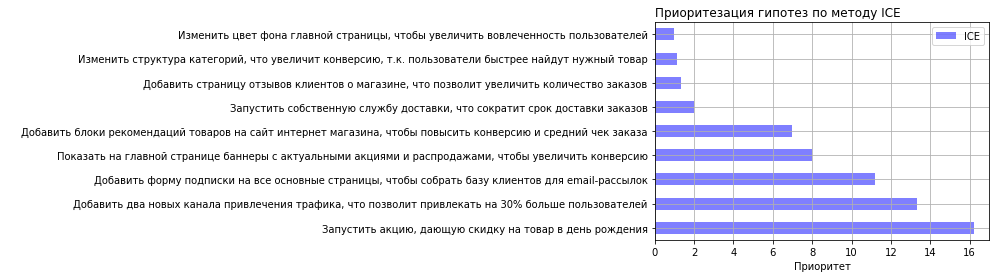

In [ ]:
#Визуальзируем распределение гипотез
ax = (hypothesis[['hypothesis', 'ICE']]
      .set_index('hypothesis')
      .sort_values('ICE', ascending=False)
      .plot(kind='barh', color='b', alpha=0.5)
     )
ax.grid(True)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу ICE', loc='left')
plt.show()

**Вывод:**\
Вывели топ-3 гипотезы, которым следует уделить пристальное внимание:
* (8)Запустить акцию, дающую скидку на товар в день рождения
* (0)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* (7)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Фреймворк RICE для приоритизации гипотез.

Отсортируйте их по убыванию приоритета.

In [ ]:
#применим фреймворк RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(2)
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head(3))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0


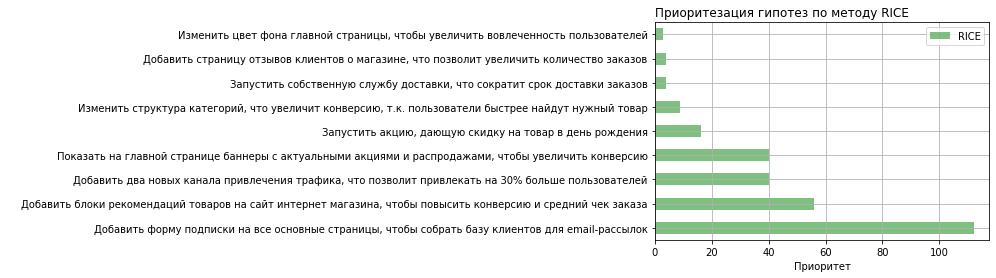

In [ ]:
#Визуальзируем распределение гипотез
ax = (hypothesis[['hypothesis', 'RICE']]
      .set_index('hypothesis')
      .sort_values('RICE', ascending=False)
      .plot(kind='barh', color='g', alpha=0.5)
     )
ax.grid(True)
ax.set_xlabel('Приоритет')
ax.set_ylabel(' ')
ax.set_title('Приоритезация гипотез по методу RICE', loc='left')
plt.show()

**Вывод:**\
ТОП-3 гипотезы:\
•	(7)Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок\
•	(2)Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа\
•	(0)Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей\



В целом видим те же самые гипотезы, только в другой последовательности. Разница приоритезиций заключается в том, что одна учитывает кол-во пользователей, которых затронут изменения, а другая - нет.


### Вывод по приоритезации гипотез


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [ ]:
#посмотрим наглядно какие гипотезы вышли в топ по двум фреймворкам
hypothesis.sort_values(by='RICE', ascending=False).head(5)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2


**Вывод:**
* Хорошо видны разлия при применении двух фреймворков по приоритизации гипотез.
* В ICE  в лидерах  гипотезы с индексами 8, 0, 7, в RICE  - гипотезы 7,2,0
* Такое отличие связанно с тем что в фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок.
* Для тестирования следуюет предложить гипотезу №7


## Анализ А/В теста

### Построение графика кумулятивной выручки по группам. Сделайте выводы и предположения.
Чтобы построить графики по кумулятивным (накапливаемым) данным, необходимо собрать соответствующий агрегированный датафрейм, содержащий информацию о дате, группе (А или В), кумулятивных количестве заказов и пользователей их оформивших, среднем чеке и, наконец, о кумулятивном количестве посетителей магазина.


In [ ]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [ ]:
# получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId' : 'nunique',
            'visitorId' : 'nunique',
            'revenue' : 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_aggregated.head(10)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


In [ ]:
#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated= dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_aggregated.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


In [ ]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulative_data.head(5))


         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


In [ ]:
# проверим, совпадает ли минимальная дата в cumulative_data с минимальной датой в исходных данных
cumulative_data['date'].min() == orders['date'].min() == visitors['date'].min()

True

In [ ]:
# проверим, совпадает ли максимальная дата в cumulative_data с максимальной датой в исходных данных
cumulative_data['date'].max() == orders['date'].max() == visitors['date'].max()

True

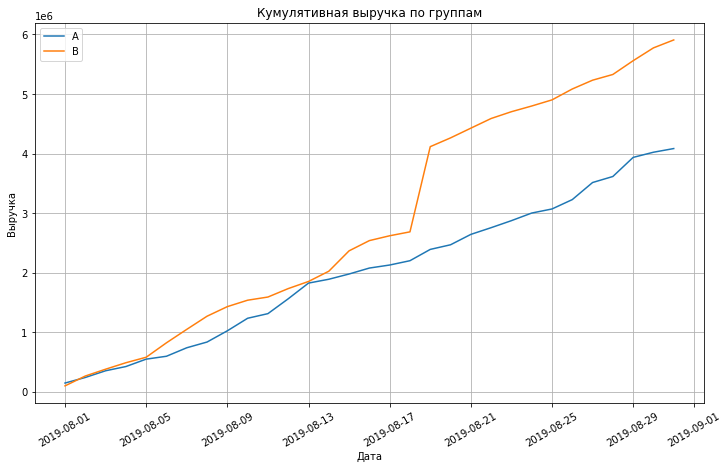

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')

plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.show()

**Вывод:**

* Кумулятивная выручка группы А растет линейно и она меньше чем у групы В.
* В группе В  в середине августа(~18 августа) заметен резкий скачок, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.**

### Построение графика  кумулятивного среднего чека по группам. Сделайте выводы и предположения.
Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

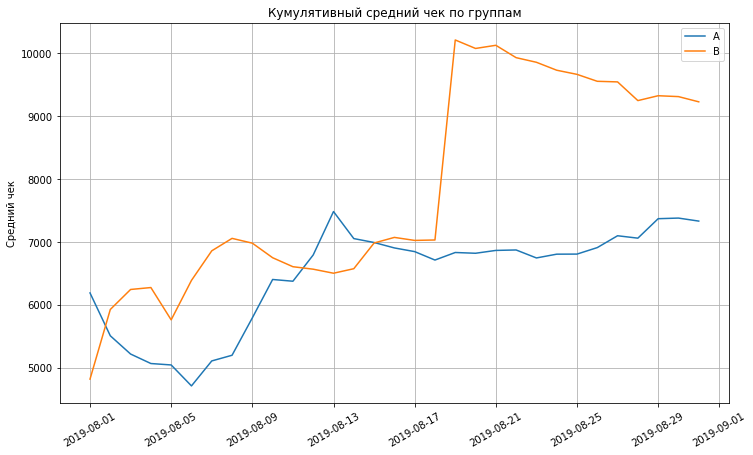

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b ['date'], cumulative_revenue_b ['revenue']/cumulative_revenue_b ['orders'], label='B')

plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средний чек')
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.show();

**Вывод:**

* Кумулятивный средний чек группы А сначала теста понизился, но к концу теста стабилизировался.
* Говоря о среднем чеке группы В, видим что он несколько выше чем у группы А, хоть и с небольшими спадами, а примерно 18 августа резко вырос, вероятно это подтверждает версию о дорогой покупке в этот период.**

### Построение графика  относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

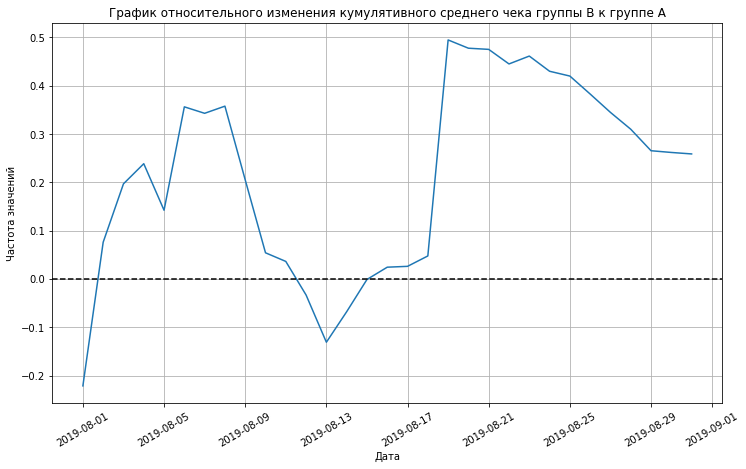

In [ ]:
# собираем данные в одном датафрейме
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['_a', '_b']
)

# cтроим отношение средних чеков
plt.figure(figsize=(12,7))
plt.plot(cumulative_revenue_ab['date'],
         (
             cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b']
         )/
         (
             cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a']
         )-1
        )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Частота значений')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.grid()
plt.show()

**Вывод:**

* В начале теста группа В проигрывала группе А, но уже примерно 2 августа вырвалась вперед. На протяжении теста происходили спады и подъемы. Графики выше указывали на выбросы блягодаря крупных заказов.
* Необходимо проанализировать данные после чистки от выбросов еще раз.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y

In [ ]:
## считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head()


,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


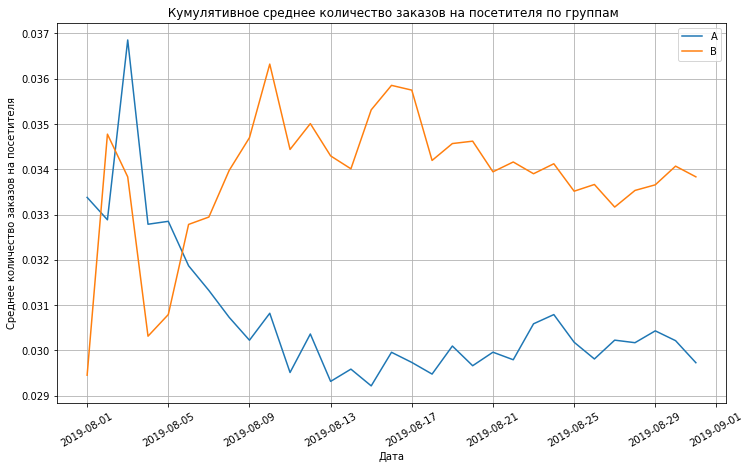

In [ ]:
# отделяем данные по группе A
cumulative_convertion_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_convertion_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(12,7))
plt.plot(cumulative_convertion_a['date'], cumulative_convertion_a['conversion'], label='A')
plt.plot(cumulative_convertion_b['date'], cumulative_convertion_b['conversion'], label='B')
plt.legend()
plt.title(' Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xticks(rotation=30)
plt.grid()
plt.show()


**Вывод:**

* В первые шесть дней теста среднее количество заказов на посетителя в целом былао выше у сегмента А.
* У группы В произошёл рост среднего количества заказов на посетителя начиная со второй недели теста, затем ситуация выровнялись у обеих групп, но в группе В среднее количество заказов на посетителя выше на протяжении остального времени теста.


### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
Сделайте выводы и предположения.

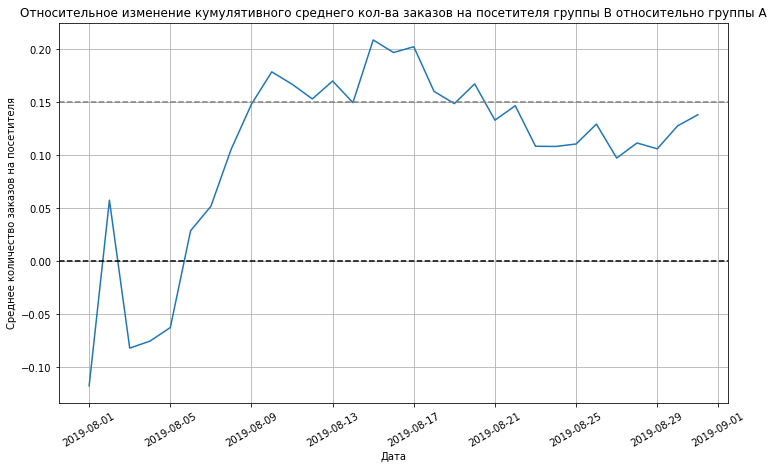

In [ ]:
cumulative_conversions_ab = (
    cumulative_convertion_a[['date','conversion']]
    .merge(
        cumulative_convertion_b[['date','conversion']],
        left_on='date',
        right_on='date',
        how='left',
        suffixes=['_a', '_b']
    )
)
plt.figure(figsize=(12,7))
plt.plot(
    cumulative_conversions_ab['date'],
    cumulative_conversions_ab['conversion_b']/
    cumulative_conversions_ab['conversion_a']-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего кол-ва заказов на посетителя группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.grid()
plt.xticks(rotation=30)
plt.show()


**Вывод:**

* Среднее количество заказов на посетителя группы В выше группы А , не смотря на точто в начале теста проигрывала.
* Мы помним по предыдущим графикам, что имеются выбросы в виде существеннокрупных заказов.
* Необходимо проанализировать данные после чистки от выбросов еще раз.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.


,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

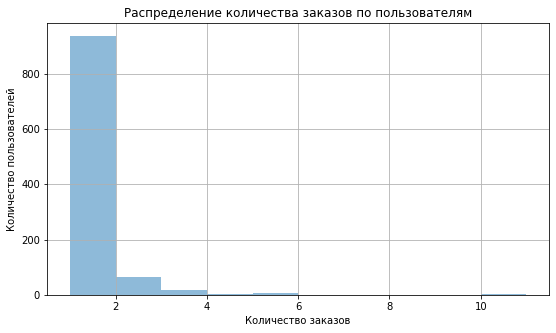

In [ ]:
#посмотрим число заказов по пользователям
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']
display(orders_by_users.head())
display(orders_by_users['orders'].describe())

# строим гистограмму
plt.figure(figsize=(9,5))
plt.hist(orders_by_users['orders'], alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

**Большинство пользователей оформляли один заказ, но есть те кто заказывал 6 и даже 11 раз**

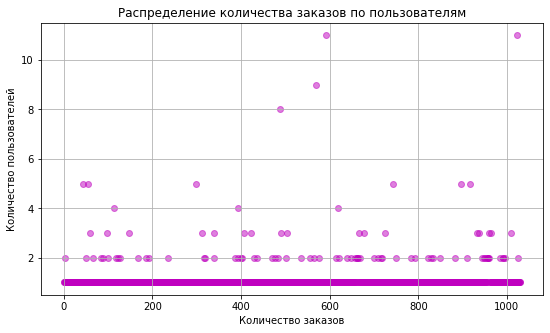

In [ ]:
x_values = pd.Series(range(0,len(orders_by_users)))

#строим точечную диаграмму
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders_by_users['orders'], color='m', alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

**Вывод:**

Мало кто из пользователей сделал более двух заказов, но и количество пользователей
сделавших два заказа,также невелико. Заказы в количестве более двух возможно аномальные.


### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [ ]:
orders_by_users_percentile = np.percentile(orders_by_users['orders'], [95, 99])
print('Количество заказов для: 5% пользователей - {:.0f}  и  1% пользователей - {:.0f}'
      .format(orders_by_users_percentile [0],orders_by_users_percentile [1]))


Количество заказов для: 5% пользователей - 2  и  1% пользователей - 4


**Вывод:**

* Более 2х заказов совершают только 5% пользователей\
И только 1% - четыре и более.
* Можно принять  за верхнюю границу 2 заказа на одного пользователя.


### Построение точечного графика стоимостей заказов.
Сделайте выводы и предположения.

count       1197.00
mean        8348.01
std        39191.13
min           50.00
25%         1220.00
50%         2978.00
75%         8290.00
max      1294500.00
Name: revenue, dtype: float64

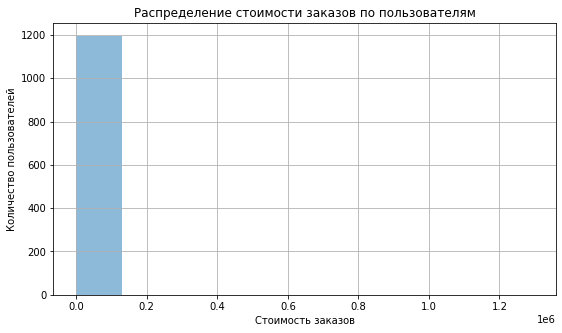

In [ ]:
display(orders['revenue'].describe().round(2))

# строим гистограмму
plt.figure(figsize=(9,5))
plt.hist(orders['revenue'], alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

**Один из заказов более 1,2 млн,довольно большой выброс**

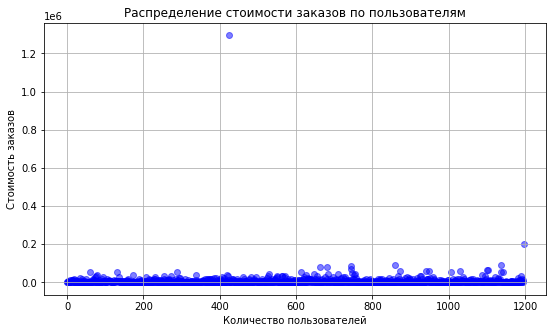

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим точечную диаграмму
plt.figure(figsize=(9,5))
plt.scatter(x_values, orders['revenue'], color='b', alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.grid()
plt.show()

**Вывод:**

* Заметны 2 аномальных значения, одно из которых явно выделяется. Скорее всего это именно тот заказ, который вызывал скачки на графиках кумулятивной суммы и средней чека


Пострим аналогичный график без двух крупных выбросов, которые заметили выше.

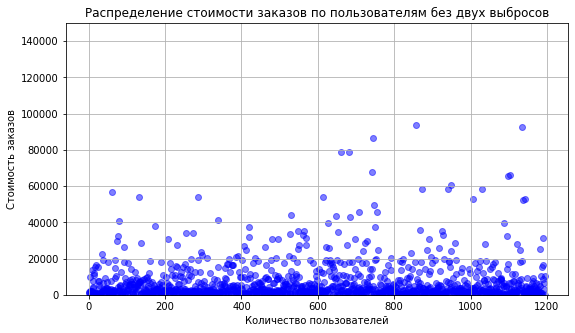

In [ ]:
# строим точечную диаграмму
plt.figure(figsize=(9,5))
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'], color='b', alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям без двух выбросов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.grid()
plt.show()

**Можно сделать вывод, что основная масса всех заказов не превышает 20 000**

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [ ]:
orders_by_revenue_percentile = np.percentile(orders['revenue'], [95, 99])
print('Количество заказов для: 5% пользователей - {:.0f}  и  1% пользователей - {:.0f}'
      .format(orders_by_revenue_percentile [0],orders_by_revenue_percentile [1]))

Количество заказов для: 5% пользователей - 28000  и  1% пользователей - 58233


**Вывод:**

Всего 1% пользователей делали заказы на сумму выше 58233, а 5% пользователей на сумму выше 28000 - определим эту сумму границей для аномали

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
Сделайте выводы и предположения.


Ранее мы выяснили, что в данных, скорее всего, есть выбросы. Потом увидели выбросы и нашли границу для их определения.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным — без удаления аномальных пользователей.

**Сформулируем гипотезы**

**H0:** Статистически значимых различий в среднем количестве заказов между группами по «сырым» данным нет. \
**H1:** Статистически значимые различия в среднем между группами по «сырым» данным  есть.


установим уровень статистической значимости = 0.05

<div class="alert alert-info">
Добавила
</div>

In [ ]:
#Создадим таблицу с данными по визитам для каждой группы.
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']


display(visitors_daily_a.head(),visitors_daily_b.head())

,date,visitors_per_date_a
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitors_per_date_b
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [ ]:
#Создадим таблицу с накопительными данными по визитам для каждой группы.
visitors_cummulative_a = cumulative_data.loc[cumulative_data['group']=='A', ['date', 'visitors']]
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_cummulative_b = cumulative_data.loc[cumulative_data['group']=='B', ['date', 'visitors']]
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

display(visitors_cummulative_a.head(),visitors_cummulative_b.head())

,date,visitors_cummulative_a
0,2019-08-01,719
2,2019-08-02,1338
4,2019-08-03,1845
6,2019-08-04,2562
8,2019-08-05,3318


,date,visitors_cummulative_b
1,2019-08-01,713
3,2019-08-02,1294
5,2019-08-03,1803
7,2019-08-04,2573
9,2019-08-05,3280


In [ ]:
#Создадим таблицу с данными по заказам для каждой группы
orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']


orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

display(orders_daily_a.head(),orders_daily_b.head())

,date,orders_daily_a,revenue_per_date_a
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


,date,orders_daily_b,revenue_per_date_b
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [ ]:
#Создадим таблицу с накопительными данными по заказам для каждой группы.
orders_cummulative_a = cumulative_data.loc[cumulative_data['group']=='A',['date','orders','revenue']]

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_cummulative_b= cumulative_data.loc[cumulative_data['group']=='A',['date','orders','revenue']]
orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']

display(orders_cummulative_a.head(), orders_cummulative_b.head())

,date,orders_cummulative_a,revenue_cummulative_a
0,2019-08-01,24,148579
2,2019-08-02,44,242401
4,2019-08-03,68,354874
6,2019-08-04,84,425699
8,2019-08-05,109,549917


,date,orders_cummulative_b,revenue_cummulative_b
0,2019-08-01,24,148579
2,2019-08-02,44,242401
4,2019-08-03,68,354874
6,2019-08-04,84,425699
8,2019-08-05,109,549917


In [ ]:
#Создадим объединенную таблицу
data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(6)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,24,148579,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,44,242401,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,68,354874,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,84,425699,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,109,549917,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,127,598401,667,655,3985,3935


Создадим переменные `orders_by_users_a` и `orders_by_users_b`  со столбцами и выведем число совершенных заказов для пользователей которые заказывали хотябы один раз.

In [ ]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']
display(orders_by_users_a.head(),orders_by_users_b.head())



,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [ ]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0,
                          index=np.arange(data['visitors_per_date_a'].sum() -
                                          len(orders_by_users_a['orders'])),
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0,
                          index=np.arange(data['visitors_per_date_b'].sum() -
                                          len(orders_by_users_b['orders'])),
                          name='orders')],axis=0
                    )


Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.

In [ ]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b, alternative = 'two-sided')[1]))
print('Относительный показатель B и A = {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))

alpha = 0.05
p-value = 0.017
Относительный показатель B и A = 0.138


**Вывод:**

p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами по «сырым» данным нет, - отвергаем.
По «сырым» данным различия в среднем количестве заказов на посетителя групп A и B есть\
Относительный выигрыш группы "B" над "A" равен 13.8%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
Сделайте выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

**Сформулируем гипотезы**

**Н0**: Статистически значимых различий в средних чеках между группами  по «сырым» данным нет\
**Н1**: Статистически значимые различия в средних чеках между группами по «сырым» данным есть

In [ ]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                                    orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('Относительный показатель B и A = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].
                                                            mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha = 0.05
p-value = 0.729
Относительный показатель B и A = 0.259


**Вывод:**\
P-value значительно больше 0.05 -  причин отвергать нулевую гипотезу и считать, что стистически значимые различий в среднем чеке есть по «сырым» данным различия, нет.\
При этом, средний чек группы B значительно выше среднего чека группы A  на 26%

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
Сделайте выводы и предположения.


Сделаем срезы пользователей с числом заказов больше 2 — `users_with_many_orders` и пользователей, совершивших заказы дороже 28000 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`. Узнаем, сколько всего аномальных пользователей методом shape().

**Сформулируем гипотезы**

**H0:** Статистически значимых различий в среднем количестве заказов между группами по «очищенным» данным нет.\
**H1:** Статистически значимые различия в среднем между группами по «очищенным» данным есть.

In [ ]:
users_with_many_orders = pd.concat(
    [orders_by_users_a[orders_by_users_a['orders'] > np.percentile(orders_by_users['orders'], 95)]['visitor_id'],
     orders_by_users_b[orders_by_users_b['orders'] > np.percentile(orders_by_users['orders'], 95)]['visitor_id']], axis = 0)
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders ], axis = 0).drop_duplicates().sort_values()
print(abnormal_users.head())
print()
print('Всего аномальных пользователей' ,abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

Всего аномальных пользователей 74


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

In [ ]:
#подготовим выборки количества заказов по пользователям по группам теста
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0,index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
                                                          ),name='orders',),],axis=0,)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0,index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
                                                          ),name='orders',),],axis=0,)

In [ ]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный показатель B и A = {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

alpha = 0.05
p-value = 0.013
Относительный показатель B и A = 0.173


**Вывод:**\
p-value = 0.013, меньше 0.05.\
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами по «очищенным» данным нет - отвергаем, по «очищенным» данным различия в среднем количестве заказов на посетителя групп A и B есть.\
А относительный выигрыш группы "B" над "A" равен 17,3% (выше, чем с «сырыми» данными - 13.8%) .

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
Сделайте выводы и предположения.

**Сформулируем гипотезы**

**Н0**: Статистически значимых различий в средних чеках между группами  по «очищенным» данным нет\
**Н1**: Статистически значимые различия в средних чеках между группами по «очищенным» данным есть

In [ ]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'], alternative = 'two-sided')[1]))

print('Относительный показатель B и A = {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))

alpha = 0.05
p-value = 0.738
Относительный показатель B и A = -0.020


**Вывод:**\
p-value по «очищенным» данным больше 0,05 а значит причин отвергать нулевую гипотезу и считать, что есть статистически значимые различия в средних чеках между группами по «очищенным» данным , нет.\
Появилось относительное различие среднего чека в 2,0% в пользу группы А.
    

## Общий вывод  и решение

В данном проекте на основании вводных данных предоставленных интернет-магазином, было произведено исследование, анализ и вынесены решения по итогу А/B теста.

### Была произведена загрузка и предобработка данных.
В целом данные хорошо подготовлены к дальнейшему исследованию (без пропусков и дубликатов).


### Произвели приоритизацию гипотез из списка, предоставленного отделом Маркетинга.
* Приоритизацию проводили с использованием двух фрэймворков ICE  RICE
* Хорошо видны различия при применении двух фреймворков по приоритизации гипотез.
* В ICE в лидерах гипотезы с индексами 8, 0, 7, в RICE - гипотезы 7,2,0
* Такое отличие связанно с тем что в фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок.
* Для тестирования следует предложить гипотезу №7

### Произвели анализ А/B теста

* Кумулятивная выручка Группы А линейна  и меньше выручки Группы В
* Кумулятивный средний чек в целом стабилет, не смотрян на небольшие спады. В обоих случаях заментно наличие аномалиий в виде очень крупных заказов.
* График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A показывает, что результаты группы В стабильно лучше группы А
* Выявили, что количество заказов более 2х и стоимость заказа более 28000 можно считать аномалией
* Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» и «сырым» данным:\
И по «сырым» и по «очищенным» данным статистически значимые различия в среднем количестве заказов на посетителя групп A и B есть. Относительный выигрыш группы B над A равен 17,3% по «очищенным» и 13.8% по "сырым" данным.

* Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» и «сырым» данным:\
по «сырым» и по  «очищенным» данным статистически значимые  различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по «очищенным» данным, по «сырым» данным, он был больше 26% - это связанно с наличием аномально крупного заказа в выборке.


### Принятое решение по результатам теста

На основании проведенного анализа, мы видим что  не смотря на то, что разница в среднем чеке до и после "очистки данных" не является статистически значимой, разница показателей  среднего количества заказов на посетителя между группами и до и после очистки данных является стастистически значимой.

Результаты тестирования вполне однозначны. **Можно принять решение остановить тестирование и зафиксировать победу группы B.

группа B значительно эффективнее группы A по  среднему количеству заказов на посетителя, хотя по среднему чеку группы примерно равны.
